# Homework 3 Question 5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

### Question 6 

Reproduce one of the images in Figure 3. 

In [2]:
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")
ds

<xarray.Dataset>
Dimensions:           (time: 6443, lat: 251, lon: 234)
Coordinates:
  * lat               (lat) float32 33.0 33.06 33.12 33.18 ... 47.88 47.94 48.0
  * lon               (lon) float32 -132.0 -131.9 -131.9 ... -118.1 -118.0
  * time              (time) datetime64[ns] 2002-06-01T09:00:00 ... 2020-01-2...
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

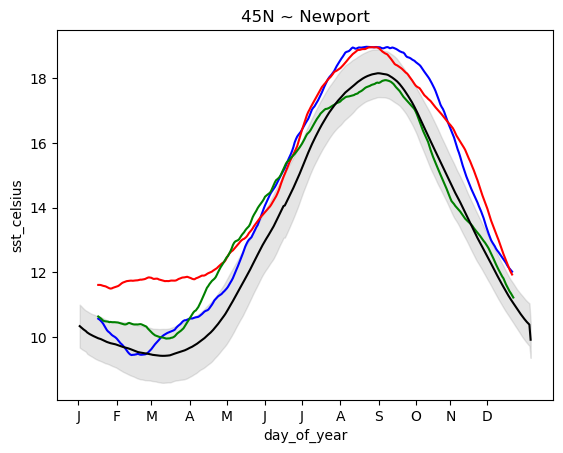

In [3]:
# 1000km offshore from newport={'name':'Newport','lat':44.634,'lon':-124.061}
# longtitude of Newport 1000km offshore is approximately 127.3163°W (used Chatgpt to find longitude)

ds.coords['day_of_year'] = ds.time.dt.dayofyear 

# changing sst from kelvin into celsius
ds = ds.assign({'sst_celsius': ds.analysed_sst - 273.15})

lat_45_year_2014 = ds.sel(lat=45, time = "2014")
lat_45_year_2014.sst_celsius.sel(lon = -127.3163, method = "nearest").rolling(time=30, center=True).mean().plot(x='day_of_year', color = 'blue');

lat_45_year_2015 = ds.sel(lat=45, time = "2015")
lat_45_year_2015.sst_celsius.sel(lon = -127.3163, method = "nearest").rolling(time=30, center=True).mean().plot(x='day_of_year', color='red');

lat_45_year_2016 = ds.sel(lat=45, time = "2016")
lat_45_year_2016.sst_celsius.sel(lon = -127.3163, method = "nearest").rolling(time=30, center=True).mean().plot(x='day_of_year', color = 'green');

# mean
all_years = ds.sel(lat = 45, lon = -127.3163, method = "nearest").rolling(time=30, center=True).mean()
mean = all_years.sst_celsius.groupby(all_years.day_of_year).mean()
mean.plot(x='day_of_year', color = 'black')

# standard deviation
std = all_years.sst_celsius.groupby(all_years.day_of_year).std() 
# upper bound
all_years = all_years.assign({'upper': mean + std})
# lower bound
all_years = all_years.assign({'lower': mean - std})

# shading
plt.fill_between(all_years.day_of_year, all_years.lower, all_years.upper, alpha=0.2, color='tab:gray')

plt.xticks(np.array([0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 301, 331]), ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])

plt.title('45N ~ Newport');

In [4]:
plt.savefig('outputs/Q06.png')

<Figure size 640x480 with 0 Axes>